# **GRADIENT BOOSTING**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![luke_hutt](https://static.wikia.nocookie.net/starwars/images/6/65/WeequayLuke-ST.jpg/revision/latest/scale-to-width-down/1000?cb=20100114145741)

Fuente de la imagen: https://static.wikia.nocookie.net


## **1. Introducción a los Gradient Boosting**

En el tema anterior (Random Forest) comentamos que los algoritmos ensamblados se podían diferenciar en dos grandes grupos:
* Los que trabajaban de manera indepediente y en paralelo: *Bagging*, y
* los que se lanzaban en serie, *Boosting*

En este tema y el siguiente nos vamos a centrar en dos algoritmos del segundo tipo.

El concepto en el que se basa Gradient Boosting es el de tratar de lanzar árboles de decisión, uno detrás de otro, de tal manera que cada uno modelice los errores del anterior. Se puede ver como un optimizador de la función de coste.

Al igual que ocurre con Random Forest, también es capaz de resolver problemas tanto de Regresión como de Clasificación.

En la siguiente imagen se puede ver cómo los sucesivos AD van a centrarse en modelizar los grupos de instancias que llevan un mayor error:

![GB](https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg)

Fuente: en.wikipedia.org

Es un algoritmo con una gran capacidad de predicción, siendo durante mucho tiempo el ganador de muchas competiciones (Kaggle, etc...). Con el tiempo aparecieron los algoritmos de Deep Learning que lo mejoraron en temas relacionados con imágenes, videos, audio o texto. Sin embargo, si disponemos de datos estruturados es seguro uno de los mejores candidatos.


<br>
<p><mark>IMPORTANTE</mark></p>
</br>
Inicialmente el algoritmo de Gradiend Boosting era usado sólo para problemas de Regresión. Más tarde se vió la forma de aplicarlos a otros de Clasificación. Sin embargo, los AD que se lanzan son siempre de Regresión. 



## **2. Generación de un modelo de Gradient Boosting**

Pasos:

1. Se separa el dataset en train y test
2. Se lanza un AD (n=0) contra los datos de *train* y se obtiene un primer modelo. Es importante puntualizar que todos los AD que se lancen van a ser de muy pocos niveles de profundidad.

```
tree_model0 = DecisionTreeRegressor()
tree_model0.fit(X_train,y_train)
```

Se calculan los errores en la predicción:

$$E_0 = \frac{1}{n}\sum(y^{pred}_0 - y_0)^2$$

donde:

$E_0$ es el error en el primer AD

$y^{pred}_0$ son los valores de predicción del primer AD

$y_0$ son los valores reales de la variable objetivo en el entrenamiento con el primer AD

En este caso, he usado MSE (Error Medio Cuadrático) para el cálculo del error. Hay otros para escoger. Normalmente se usan los que vienen por defecto en Scikit Learn.

3. Se lanza un nuevo AD pero esta vez para modelizar lo siguiente:

```
tree_model1 = DecisionTreeRegressor()
tree_model1.fit(X_train,E0)
```
La variable objetivo ha dejado de ser "y" para convertirse en el error de la estimación anterior.

Estos 2 pasos se ejecutan varias veces. El número de veces es un parámetro muy importante. Si lo ejecutamos demasiadas veces estaremos corriendo el riesgo de llevar al modelo a sobreajustar.

**¿Cuál es entonces la predicción final de Gradient Boosting?**

$$treemodel_0.predict(X_{train})+treemodel_1.predict(X_{train})+...+treemodel_n.predict(X_{train})$$

Es decir, será la suma de todas las predicciones. 

![GB_schema](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw6zezdliKWkGknCJ6R%2F-Lw70EB_T-Y3OCO-L_4o%2Fimage.png?alt=media&token=a3edaf4a-d3d2-4c84-9a10-3d870c21d641)

Fuente: https://docs.paperspace.com/machine-learning/wiki/gradient-boosting












In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=42)
print (X.shape)
print (y.shape)

(2000, 2)
(2000,)


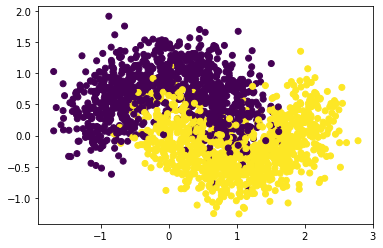

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1400, 2) (1400,)
(600, 2) (600,)


In [ ]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

700
700
300
300


In [ ]:
gb_model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=2)
gb_model.fit(X_train, y_train)
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.64
Precisión sobre los datos de test: 90.67


In [ ]:
pred_train

array([0, 1, 1, ..., 0, 1, 1])

**Grafo en Python**

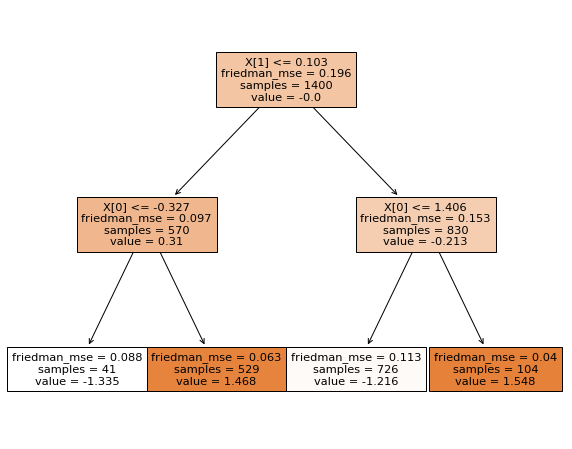

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(gb_model.estimators_[2][0], filled=True, max_depth=2)
plt.show()

Como se puede ver, los AD son de Regresión. No devuelven el error de Gini, sino un error especial denominado "friedman_mse". Tampoco devuelve un *value* de [0,1] sino que se trata de valores continuos.

In [ ]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black', alpha=0.5
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

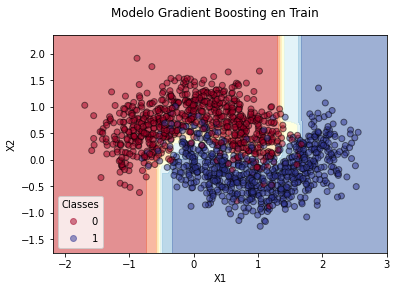

In [ ]:
plot_boundaries_test(X_train, y_train, gb_model, True, X_train, y_train, "Modelo Gradient Boosting en Train")

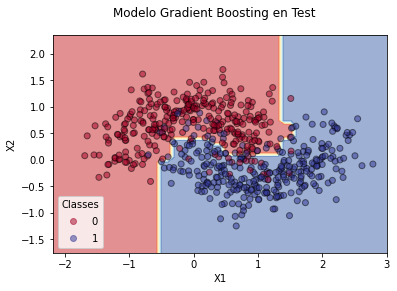

In [ ]:
plot_boundaries_test(X_train, y_train, gb_model, False, X_test, y_test,"Modelo Gradient Boosting en Test")

### **2.1. Weak Learners**

A los diferentes AD se les denomina como "weak learners", donde weak es débil en castellano. Debido a la forma de ensamblado, los AD sólo tienen que tener de 1 a 5 niveles (max_depth). 

De esta forma nos aseguramos que los AD no se ajusten demasiado por sí solos a los datos sino que vayan aportando su grano de arena. Cada AD nos dará buenas predicciones en una parte pequeña de los datos, dando la posibilidad a los siguientes de ir mejorando la predicción del resto.

### **2.2. Learning Rate**

En este apartado quiero hablar sobre un parámetro muy importante: **learning rate**.

Se trata de un parámetro que no se había visto hasta ahora en AD o Random Forest. Aparece como consecuencia del parecido de su funcionamiento con la optimización de "Gradient Descent" de otro tipo de algoritmos.

Recordemos que, a grandes rasgos, el algoritmo de Gradient Descent trata de minimizar la función de coste (error en predicciones). En la siguiente figura se puede ver:

![Gradient_Descent3D](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw5TMq46bZGMFbfk1mp%2F-Lw6lSr3sxuY0gzJBEB9%2Fimage.png?alt=media&token=de87218f-2936-4e0c-9aad-975ccf88ad98)

Fuente: https://docs.paperspace.com/machine-learning/wiki

Se trata de ir dando pasos mediante el cálculo de la derivada (gradiente) para poco a poco acercarnos al mínimo de esa función de coste.

Esos pasos pueden ser cortos o largos. Si son muy cortos tardamos mucho en llegar al mínimo pero es bastante seguro que lo conseguiremos. Si son muy largos, existe la posibilidad de pasarnos de largo y no encontrarlo.

El parámetro *learning rate* funciona de la siguiente manera:

* **Si es un valor alto**: cada nuevo AD va a realizar correcciones más "fuertes" sobre los errores de los anteriores. Estaríamos dando los pasos largos del Gradient Descent. El modelo se estaría haciendo más complejo en menos tiempo, con el consiguiente peligro de sobreajuste.

* **Si es un valor muy pequeño**: las correcciones son menores y necesitaremos más AD para conseguir el ajuste deseado. Menos posibilidad de sobreajuste.




### **2.3. Corrección de errores**

Vamos a ver cómo se comporta el modelo para diferentes AD. Se puede ver cómo cada uno se va ajustando a una zona diferente del plano.

He cambiado el **learning rate** a 1.0 (el modelo anterior tenía su valor por defecto, 0.1). Al subir el valor a 1.0, tenemos un algoritmo más "agresivo" en la corrección de errores y se ve mejor en los gráficos.


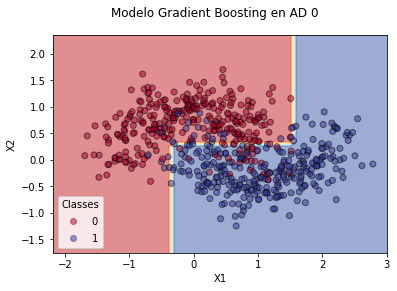

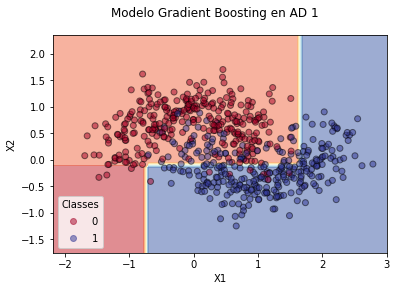

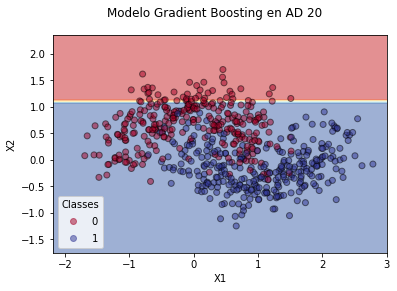

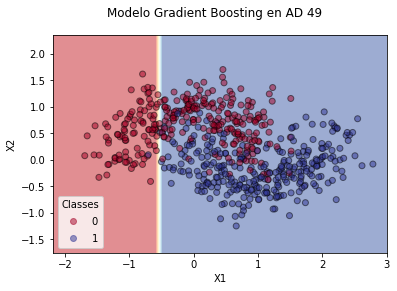

In [ ]:
for i in [0, 1, 20, 49]:
  gb_model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=2, learning_rate=1.0)
  gb_model.fit(X_train, y_train)
  pred_train = gb_model.estimators_[i][0].predict(X_train)
  pred_test = gb_model.estimators_[i][0].predict(X_train)
  plot_boundaries_test(X_train, y_train, gb_model.estimators_[i][0], False, X_test, y_test,f"Modelo Gradient Boosting en AD {i}")

## **3. El número de Árboles de Decisión**

Vamos a ver su vinculación con *learning rate* y sus efectos sobre el modelo:

* Si número de AD es alto y learning rate es alto: nos encontramos con un modelo que corrige errores rápidamente, repitiendo el proceso de corrección muchas veces: overfitting
* Si número de AD es bajo y learning rate es bajo: el modelo tarda mucho en corregir (ajustar) y no le damos suficientes AD para que lo haga: underfitting

Los dos casos más interesantes es cuando uno es alto y el otro es bajo, o cuando ninguno de los dos es demasiado alto o demasiado bajo.

El caso ideal es el de *learning rate* bajo y número de AD alto. Pero esto lleva a modelos muy lentos de entrenar. 

El ajuste final debe venir del uso de muchos ensayos hasta encontrar el que mejor se adecúa a la naturaleza de nuestros datos.


## **4. Parada Temprana (Early Stopping)**

Es una técnica para encontrar el número óptimo de AD. 

Vamos a usar un método que nos ofrece Scikit Learn denominado: *staged_predict()*, que nos da información sobre las predicciones de cada uno de los AD.

Vamos a verlo con el dataset de Regresión sobre la progresión de la "Diabetes". 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
## Carga de los datos
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [ ]:
## Creación del dataframe
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["progression"])
df_all = pd.concat([df_features, df_target],axis=1)
## Split en Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    random_state=42, test_size=0.3)
## Generación del modelo
gb_model = GradientBoostingRegressor(random_state=0, n_estimators=200, max_depth=1, learning_rate=0.2)
gb_model.fit(X_train, y_train)
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 67.69
Precisión sobre los datos de test: 47.17


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


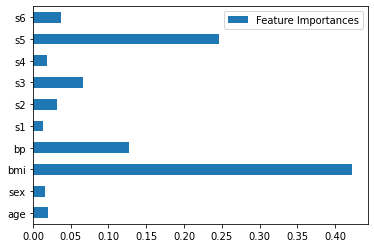

In [ ]:
df_imp = pd.DataFrame(gb_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

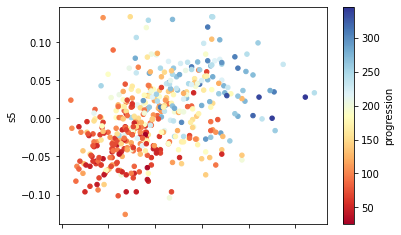

In [ ]:
df_all.plot.scatter(x="bmi", y="s5", c="progression", cmap=plt.cm.RdYlBu)

Ahora vamos a calcular el MSE de cada una de las predicciones de los AD

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gb_model.staged_predict(X_test)]
errors[0:5]

[4914.268121541687,
 4328.8960887354315,
 4045.9912723253788,
 3705.617127897386,
 3635.7476283009855]

In [ ]:
## el mejor número de AD nos lo da el índice donde MSE es menor
best_n_AD = np.argmin(errors)
best_n_AD

50

In [ ]:
best_model = GradientBoostingRegressor(random_state=0, n_estimators=best_n_AD, max_depth=1, learning_rate=0.1)
best_model.fit(X_train, y_train)
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*best_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*best_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 54.39
Precisión sobre los datos de test: 48.58


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


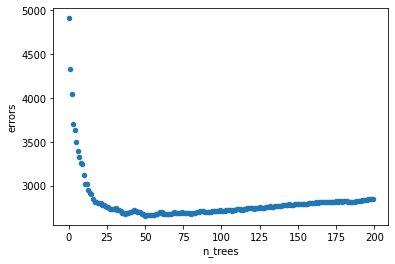

In [ ]:
d = pd.DataFrame({"n_trees":list(range(200)), "errors":errors})
d.plot.scatter(x="n_trees", y= "errors")

## **5. Stochastic Gradient Boosting**

Cuando estemos trabajando con un dataset muy grande puede ser interesante lanzar los diferentes AD sobre subconjuntos de éste.

Scikit Learn nos ofrece un parámetro que se denomina **subsample** con el que podemos decidir la proporción de instancias que se van a usar.

Si decidimos que subsample = 0.5, entonces los AD se modelizan sobre subconjuntos *aleatorios* de tamaño la mitad del dataset. De esta forma, el entrenamiento se llevará a cabo en menos tiempo y con menos recursos de máquina.

## **6. Random Forest y Gradient Boosting**



**Random Forest**

* Su entrenamiento es costoso en tiempo y recursos pero es fácilmente paralelizable (n_jobs).
* No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el dataset.
* Nos dan la importancia de las variables predictoras.
* Mejoran en precisión a los AD al tiempo que son mucho más robustos frente a "overfitting".
* No es capaz de hacer forecast en series temporales.
* No trabaja bien con sparse datasets (con muchos ceros).
* Sus AD suelen ser de mayor profundidad que en Gradient Boosting.


**Gradient Boosting**
* Su entrenamiento es también costoso en tiempo y recursos y no se puede paralelizar.
* No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el dataset.
* Nos dan la importancia de las variables predictoras.
* Mejoran, en muchas ocasiones, la precisión de Random Forest. Pero es más fácil caer en overfitting.
* El rendimiento de estos algoritmos es más dependiente de los parámetros. Es más difícil de afinar (tuning).
* No es capaz de hacer forecast en series temporales.
* No trabaja bien con sparse datasets (con muchos ceros).
* Sus AD son siempre de muy poca profundidad (weak learners).